# Predicting Bike Rentals

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")

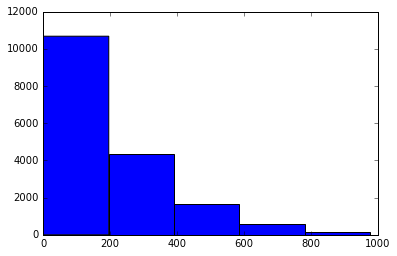

In [5]:
%matplotlib inline
plt.hist(bike_rentals["cnt"], bins = 5)
plt.show()

In [14]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

# Calculating Features

It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information, or distilling existing information.

In [16]:
def assign_label(hour):
    if hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour < 24:
        return 3
    elif hour >= 0 and hour < 6:
        return 4
    return

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [18]:
bike_rentals["time_label"].head(10)

0    4
1    4
2    4
3    4
4    4
5    4
6    1
7    1
8    1
9    1
Name: time_label, dtype: int64

# Splitting data into training and testing

Before applying a machine learning algorithm, we need to split the data into training and testing sets. 
If we train an algorithm on the training data, then evaluate its performance on the same data, we can get an unrealistically low error value, due to overfitting.

In [19]:
train = bike_rentals.sample(frac = 0.8)

In [20]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

# Applying Linear Regression 


In [24]:
r = ["cnt", "casual", "dteday", "registered"]
for i in r:
    columns.remove(i)
columns

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(train[columns], train["cnt"])
test_predictions = lr.predict(test[columns])
mse = mean_squared_error(test["cnt"], test_predictions)
print(mse)

20267.186761441317


# Error

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

# Applying Decision Trees

In [42]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf = 2)
tree.fit(train[columns], train["cnt"])
predictions = tree.predict(test[columns])

error = mean_squared_error(test["cnt"], predictions)
print(error)

2808.503612070068


## Decision tree error

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

# Applying Random Forest Algorithm

In [44]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100)
forest.fit(train[columns], train["cnt"])
predictions = forest.predict(test[columns])

error = mean_squared_error(test["cnt"], predictions)
print(error)

1682.0142493670885


In [ ]:
By using an ensemble of Decision Trees in the Random Forest Algorithm, we're able to succes'